# Logistic regression To predict heart disease

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Dataset - Linear regression\heart disease.csv')

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
df_filled = df.fillna({
    'education': df['education'].median(),
    'cigsPerDay': df['cigsPerDay'].mean(),
    'BPMeds': df['BPMeds'].mode()[0],
    'totChol': df['totChol'].mean(),
    'BMI': df['BMI'].mean(),
    'heartRate': df['heartRate'].mean(),
    'glucose': df['glucose'].mean()
})

In [13]:
df_filled.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
X = df_filled[df_filled.columns[:15]]
y = df_filled[df_filled.columns[15:]]

In [17]:
column_names = X.columns.tolist()
print(column_names)

['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [19]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [21]:
y.head()

,TenYearCHD
0,0
1,0
2,0
3,1
4,0


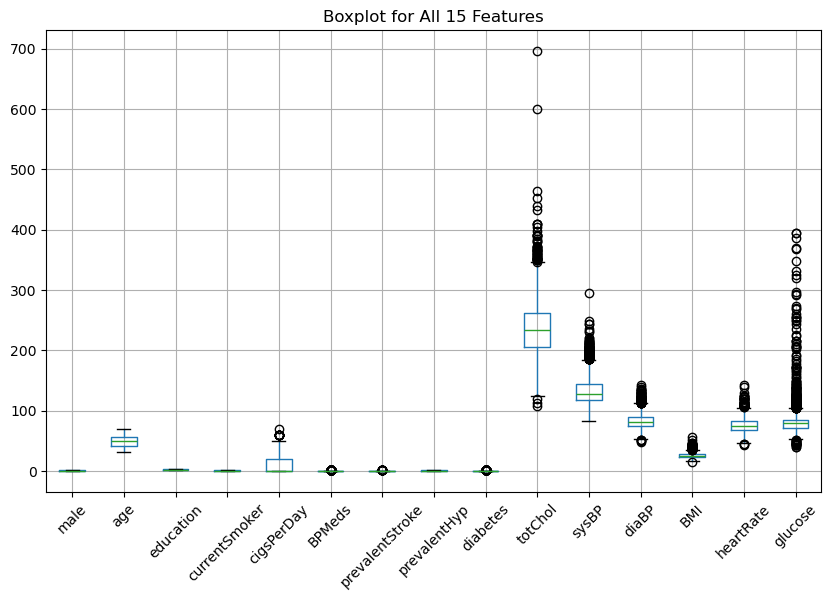

In [23]:
# Ploting the features as a boxplot
plt.figure(figsize=(10, 6))
X.boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title('Boxplot for All 15 Features')
plt.show()

In [25]:
# Standardizing data 
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled, columns=column_names)

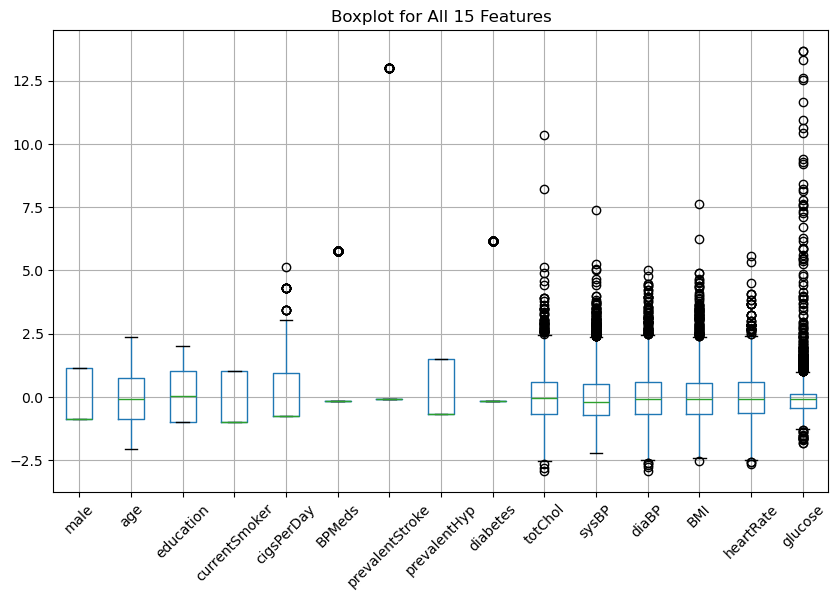

In [27]:
plt.figure(figsize=(10, 6))
X_scaled.boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title('Boxplot for All 15 Features')
plt.show()

In [29]:
X_scaled = np.array(X_scaled)
y = np.array(y)
y = y.ravel()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

In [33]:
X_train[:5]

array([[ 1.1531919 , -0.41825733,  0.02038662, -0.98827076, -0.75797428,
        -0.17361158, -0.07703255, -0.67110093, -0.16247659, -1.09928343,
         0.12015128,  1.0165492 ,  0.2550054 , -1.320629  , -0.17372204],
       [ 1.1531919 , -1.7016326 ,  1.01347291,  1.01186844,  2.60964461,
        -0.17361158, -0.07703255, -0.67110093, -0.16247659, -1.39259663,
        -0.92361916, -1.71237746, -1.17234741, -0.23943627, -0.56787269],
       [-0.86715836, -0.30158686,  1.01347291, -0.98827076, -0.75797428,
        -0.17361158, -0.07703255, -0.67110093, -0.16247659,  1.29234735,
        -1.05976314, -0.87270771,  0.68493095,  0.50908178, -0.21751656],
       [ 1.1531919 , -1.46829164,  0.02038662,  1.01186844,  1.76773988,
        -0.17361158, -0.07703255, -0.67110093, -0.16247659, -1.30234642,
        -0.03868335, -0.15898843, -0.19948732, -0.98795431, -0.61166721],
       [-0.86715836,  1.79848176,  0.02038662, -0.98827076, -0.75797428,
        -0.17361158, -0.07703255,  1.49008884, 

In [35]:
y[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [37]:
X_train.shape

(3390, 15)

In [39]:
y_train.shape

(3390,)

In [41]:
def sigmoid(X, y, w, b):
    z = np.matmul(X, w) + b
    f_wb = 1/(1 + np.exp(-z))

    return f_wb

In [43]:
def logistic_loss_gd(X, y, w, b):
    m = X.shape[0]
    
    z = np.matmul(X, w) + b
    f_wb = 1/(1 + np.exp(-z))    
    
    J_wb = np.dot( y, np.log(f_wb) ) + np.dot( (1 - y) , np.log(1 - f_wb) )
    J_wb = (-1/m) * J_wb

    return J_wb

def logistic_loss(X, y, w, b):
    m = X.shape[0]
    print(X.shape, " shape of X")
    print(y.shape, " shape of y")
    print(w.shape, " shape of w")
    
    z = np.matmul(X, w) + b
    f_wb = 1/(1 + np.exp(-z))

    print(f_wb.shape, " shape of f_wb")    
    
    J_wb = np.dot( y, np.log(f_wb) ) + np.dot( (1 - y) , np.log(1 - f_wb) )
    J_wb = (-1/m) * J_wb

    return J_wb

In [45]:
def compute_gradient(X, y, w, b):
    m,n = X.shape

    z = np.matmul(X, w) + b
    f_wb = 1/(1 + np.exp(-z))
    error = f_wb - y
    
    dj_dw = np.matmul(X.T, error)
    dj_db = np.sum(error)

    dj_dw = dj_dw/m
    dj_db = dj_db/m

    #print(dj_dw.shape)
    #print(dj_db.shape)
    
    return dj_dw.T, dj_db

In [47]:
def gradient_descent(X, y, w, b, alpha, logistic_loss_gd, compute_gradient, num_iter):
    J_history = []
    p_history = []
    
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        #print(dj_dw.shape, " shape of dj_dw")
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        J_history.append(logistic_loss_gd(X, y, w, b))
        p_history.append([w,b])

        if i% math.ceil(num_iter/10) == 0:
            '''
            print(f"Iteration {i}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            '''
            print(f"Iteration {i}: Cost {J_history[-1]} ")

    return w , b, J_history, p_history

In [49]:
w = np.zeros(X_train.shape[1])
b = 0
alpha = 0.001
num_iter = 100000

w_final, b_final, J_history, p_history = gradient_descent(X_train, y_train, w, b, alpha, logistic_loss_gd, compute_gradient, num_iter)
print(f"(w,b) found by gradient descent: {w_final},{b_final}")

Iteration 0: Cost 0.6929992067216517 
Iteration 10000: Cost 0.4000883859925253 
Iteration 20000: Cost 0.38714055363260635 
Iteration 30000: Cost 0.3851332325777376 
Iteration 40000: Cost 0.38467373314471837 
Iteration 50000: Cost 0.3845441459704599 
Iteration 60000: Cost 0.3845002092582098 
Iteration 70000: Cost 0.3844822075301746 
Iteration 80000: Cost 0.3844734932873048 
Iteration 90000: Cost 0.38446875675150943 
(w,b) found by gradient descent: [ 0.29182391  0.48284804 -0.05596762  0.02563489  0.19638546  0.05693758
  0.07971493  0.09625914  0.05955963  0.11441029  0.31382689 -0.05940032
  0.04678817 -0.01423849  0.1559706 ],-1.942002235667513


In [51]:
logistic_loss(X_test, y_test, w_final, b_final)

(848, 15)  shape of X
(848,)  shape of y
(15,)  shape of w
(848,)  shape of f_wb


0.35854772173446464

In [55]:
test_output = sigmoid(X_test, y_test, w_final, b_final)

In [57]:
test_output = np.where(test_output > 0.5, 1, 0)

In [61]:
accuracy = np.mean(test_output == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.20%
